# Digital Image Processing - Problem Set 1

## Student Names: 
* Karolay Ardila Salazar
* Julián Sibaja García
* Andrés Simancas Mateus

### Instructions

This first Problem Set covers the topics of basic image manipulation, spatial resolution and intensity level resolution. <br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

### Definitions

In [2]:
'''This is a definition script, so we do not have to rewrite code'''

import numpy as np
import cv2
import matplotlib.pyplot as mplt


# set matplotlib to print inline (Jupyter)
%matplotlib inline

# path prefix
pth = '../data/'

# files to be used as samples
# list *files* holds the names of the test images
files = ['cameraman.png', 'moon.jpg', 'rose.bmp', 'skull.bmp', 'Woman.bmp','hut.jpg']

# Usefull function
def rg(img_path):
    return cv2.imread(pth+img_path, cv2.IMREAD_GRAYSCALE)

<b>1. </b>Load image from a file and display the image. Determine the size of the image. Finally, save a new copy of the image in a new file.<br /> <br />

height: 256
width: 256
['cameraman.png', 'moon.jpg', 'rose.bmp', 'skull.bmp', 'Woman.bmp', 'new_cameraman.png']


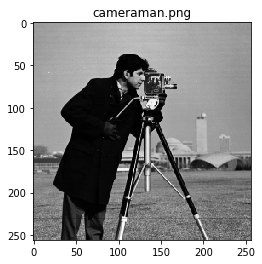

In [3]:
img1 = rg(files[0])

hg, wd = img1.shape # function that returns a tuple with 2 parameters
print 'height: ' + str(hg)
print 'width: '+ str(wd)

mplt.figure()
mplt.imshow(img1, cmap='gray')
mplt.title(files[0])

img2 = img1.copy() 
cv2.imwrite(pth + 'new_cameraman.png', img2) # create a new file called 'cameraman_new.png'
if files[-1] != 'new_cameraman.png': 
    files.append('new_cameraman.png') # add the new element to the list
print files # checking 

<b>2. </b>Write a function <code>flip_image</code>, which flips an image either vertically or horizontally. The function should take two input parameters: the matrix storing the image data and a flag to indicate whether the image should be flipped vertically or horizontally. Use this function to flip an example image both vertically and horizontally. <b>Tip:</b> You can use numpy array indexing or OpenCV's <a href="http://docs.opencv.org/modules/core/doc/operations_on_arrays.html#flip">flip</a> function to solve this problem. <br /> <br />

<img style="float: left; margin: 0px 0px 15px 15px;" src="../data/Woman.bmp" height="200" width="200">

<b>3. </b> Write a function to generate the negative of an image. This means that  a new image is created in which the pixel values are all equal to 1.0 minus the pixel value in the original image. <br /> <br />

<img style="float: left; margin: 0px 0px 15px 15px;" src="../data/moon.jpg" height="200" width=200>

<b>4. </b>Write a function <code>average_intensity</code>, which calculates the average intensity level of an image. Use this function on example images and discuss your results. You can use images from section 2 and 3 <br /> <br />

In [55]:
def average_intensity(img):
    return img.mean()

for avg, name in zip([average_intensity(rg(i)) for i in files], files):
    print 'Average intensity of "', name, '":', avg

Average intensity of " cameraman.png ": 118.724487305
Average intensity of " moon.jpg ": 42.6058197667
Average intensity of " rose.bmp ": 46.7893533707
Average intensity of " skull.bmp ": 129.390096304
Average intensity of " Woman.bmp ": 93.2467


<b>5. </b>Write a function <code>threshold_image</code> which thresholds an image based on a threshold level given as a parameter to the function. The function should take two parameters: the image to be thresholded and the threshold level. The result of the function should be a new thresholded image. <br /> <br />

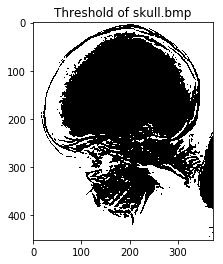

In [59]:
def threshold_image(img, th):
    # ignore retVal parameter, no Otsu binarization will be applied
    _, t = cv2.threshold(img, th, 255, cv2.THRESH_BINARY_INV)
    return t

img = threshold_image(rg(files[3]), 150)
mplt.figure()
mplt.imshow(img, cmap='gray')
mplt.title('Threshold of ' + files[3])

<b>6. </b>Write a function avg_intensity_threshold_image which takes an image as its only parameter and thresholds this image based on the images average intensity value. <b>Hint:</b> Simply write a new function that uses the two functions just written. <br /> <br />

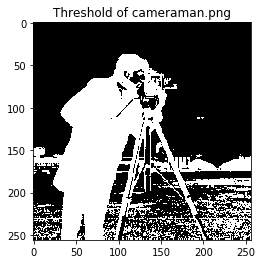

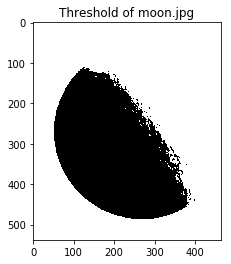

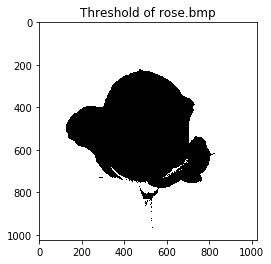

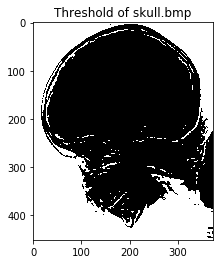

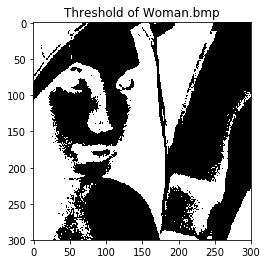

In [57]:
def avg_intensity_threshold_image(img):
    return threshold_image(img, average_intensity(img))

ths = [avg_intensity_threshold_image(rg(i)) for i in files]
for t, name in zip(ths, files):
    mplt.figure()
    mplt.imshow(t, cmap='gray')
    mplt.title('Threshold of ' + name)

<b>7. </b>Write a function which subsamples a grayscale image of size 512x512 by factors of 2, i.e., 256, 128, 64 and display your results. There are multiple ways to do this as discussed in the textbook. You may simply sub-sample, average, etc.  Describe which you used and why.

<img style="float: left; margin: 0px 0px 15px 15px;" src="../data/rose.bmp" height="256" width="256">
<img style="float: left; margin: 0px 0px 15px 15px;" src="../data/rose.bmp" height="128" width="128">
<img style="float: left; margin: 0px 0px 15px 15px;" src="../data/rose.bmp" height="64" width="64">
<img style="float: left; margin: 0px 0px 15px 15px;" src="../data/rose.bmp" height="32" width="32">

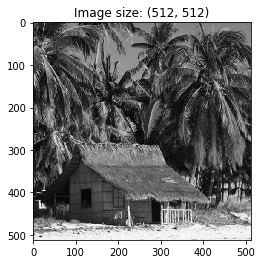

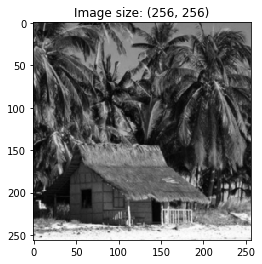

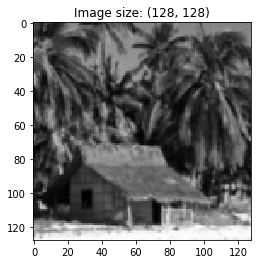

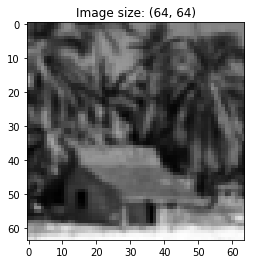

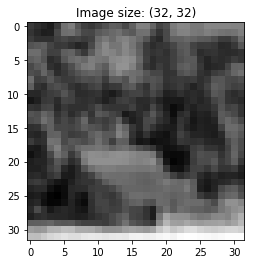

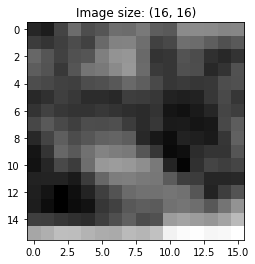

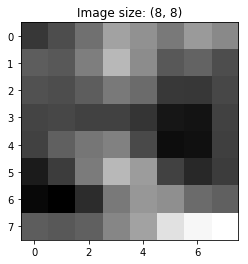

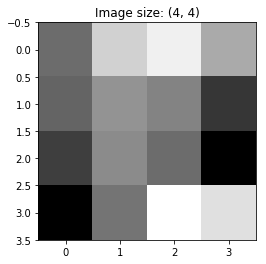

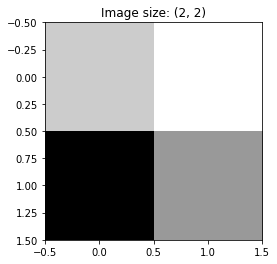

In [11]:
def downSampling(src,N):
    '''Downsample an image N times. 
       src: Image data
       N:   Number of subsamples(it must be lower than 9) 
       [!] if N is too large it will display the max amount of samples
    '''
    
    if src.shape[:2] != (512,512) : # image(512x512) verification
        print("[!] Image is not 512x512")
    else:
        # Plotting the base image
        mplt.figure()
        mplt.imshow(src, cmap='gray')
        mplt.title("Image size: "+str(src.shape[:2]))
        n = 1
        # Loop for plotting the N subsamples
        while(n <= N):
            src = cv2.pyrDown(src) # subsample to 1/2
            mplt.figure()
            mplt.imshow(src, cmap='gray')
            mplt.title("Image size: "+str(src.shape[:2]))
            n += 1
            if n >= 9: # Condition in the case of 'N' been too large
                return
            
pic = rg(files[5])
downSampling(pic, 3)
            

<b>8. </b>Keeping your original image resolution reduce the number of gray levels in your image from 256 to 2 in powers of 2. Display your results.

<img style="float: left; margin: 0px 0px 15px 15px;" src="../data/skull.bmp" height="200" width=200>